A Numerical solution for Time Delay PDE

My idea comes from my previous job in an old style glass manufactory. There was a large furnace lying in the middle of the factory. Originally, I want to check out he heat transfer and distribution inside the furnace. In according to Wang (1963), the product that has to be heat treaded was feed into the furnace, the temperature of the furnace was controlled by the heat controller which could be considered as the boundary conditions.  The following is the equation he used todescribe the working condition of the furnace. 

$$\frac{\partial u(t,x)}{\partial t} = k\frac{\partial^2 u(t,x)}{\partial x^2} +v(g(u(t-\tau_1)))\frac{\partial u(t,x)}{\partial x} +c(f(u(t -\tau _2))-u(t,x))$$

Unfortunately, I cannot find more details about this equation, for it has been written about 60 years. But the equation itself is an interesting top until now, a time delay partial deferential equation(DPDE). So in my project, I want to talk about solving a specific nonlinear delay convection-reaction–diffusion equation in 1D and 2D. Let’s go. 

1D Problem

Firstly, we start with the easier 1D diffusion. Here comes the equation. 

$$\frac{\partial u(t,x)}{\partial t} = \alpha\frac{\partial^2 u(t,x)}{\partial x^2} +\beta\frac{\partial u(t,x)}{\partial x} +\omega(x,t)(1 -\omega(x,t-\tau))+f(t,x)),  (x,t)\in(0,T]$$

where $f(x,t) = \alpha_e^t+\beta_e^tsin(t)+e^{2t-\tau}sin^2(x), \alpha = \beta =1, a = 0, b = 1, T =2, s= 0.1$

Discretization

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
from matplotlib import animation
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#initial conditions 
nt = 1001
nx = 51

s = 0.1
T = 2
L = numpy.pi
dx = L/(nx-1)
dt = T/(nt-1)

x = numpy.linspace(0, L, nx)

u = numpy.zeros(nx)
u0 = numpy.sin(x)

In [3]:
def fxt(x,t):
    
    fxt = numpy.exp(t) * numpy.cos(x) + \
          numpy.exp(t) * numpy.sin(t) + \
          numpy.exp(2*t - s) * numpy.sin(x)**2
            
    return fxt

In [4]:
def func_u(u, x, nt, dt, dx,s):
    
    un = numpy.zeros_like(u)
    unt = numpy.zeros((nt+1,nx))
    
    i = 0
    
    for n in range(nt):
        
        tn = i-int(s/dt)
        un = u.copy()
        u[1:-1] = un[1:-1] + \
                  dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) -\
                  dt/dx*(un[2:] - un[1:-1]) + \
                  dt*un[1:-1] * (1-unt[tn,1:-1]) + dt*fxt(x,dt*i)[1:-1]
                               
        u[0] = 0
        u[-1] = numpy.exp(dt*i)*numpy.sin(L)
        unt[i,:] = u[:]
        i = i + 1
        
    return u

In [5]:
u_num = func_u(u0.copy(), x, nt, dt, dx,s)
u_exact = numpy.exp(T)*numpy.sin(x)

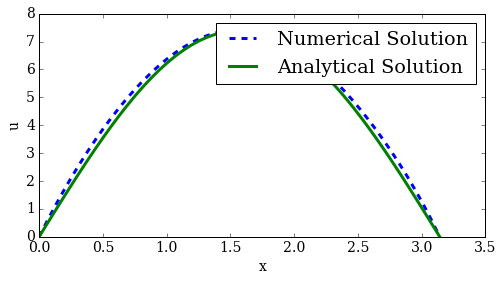

In [6]:
pyplot.figure(figsize=(8,4))
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('x', fontsize=14) #x label
pyplot.ylabel('u', fontsize=14) #y label
pyplot.plot(x, u_num, ls='--', lw=3)
pyplot.plot(x, u_exact, ls='-', lw=3)
pyplot.legend(['Numerical Solution','Analytical Solution']);

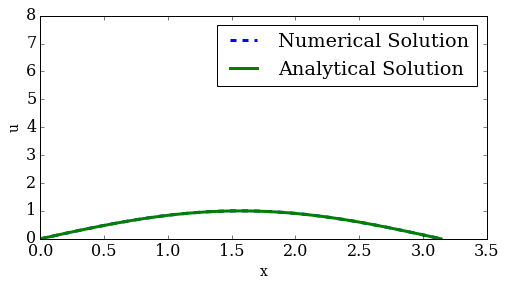

In [7]:
fig = pyplot.figure(figsize=(8,4))
ax = pyplot.axes(xlim=(0,3.5), ylim=(0,8))
line = ax.plot([], [], ls='--', lw=3)[0]
line2 = ax.plot([], [], ls='-', lw=3)[0]
pyplot.xlabel('x', fontsize=14) #x label
pyplot.ylabel('u', fontsize=14) #y label
ax.legend(['Numerical Solution','Analytical Solution'])


unt = numpy.zeros((nt+1,nx))
u = u0

def time_delay(n):
    
    un = u.copy()
    tn = n-int(s/dt)
    
    u[1:-1] = un[1:-1] + \
              dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) -\
              dt/dx*(un[2:] - un[1:-1]) + \
              dt*un[1:-1] * (1-unt[tn,1:-1]) + dt*fxt(x,dt*n)[1:-1]
                               
    u[0] = 0
    u[-1] = numpy.exp(dt*n)*numpy.sin(L)
    unt[n,:] = u[:]
    

    u_exact = numpy.exp(n*dt)*numpy.sin(x)   
    line.set_data(x,u)
    line2.set_data(x,u_exact) 
        
        
anim = animation.FuncAnimation(fig, time_delay,frames=nt,interval=10)

In [8]:
HTML(anim.to_html5_video())

2D

In [9]:
L = numpy.pi
H = numpy.pi

nx = 31
ny = 31
nt = 500

dx = L/(nx-1)
dy = H/(ny-1)

s = 0.1
T = 2

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

u = numpy.zeros((ny, nx))

#set initila condition for u0
u1 = numpy.zeros_like(u)
u2 = numpy.zeros_like(u)
for n in range(ny):
    u1[n:] = numpy.sin(y)
for n in range(nx):
    u2[:,n] = numpy.sin(x)
u0 = u1 + u2

In [10]:
def ft_2d(x,y,t):
    
    ft = numpy.zeros_like(u)
    fty = numpy.zeros_like(u)
    ftx = numpy.zeros_like(u)
    
    ft1 = fxt(x,t)
    ft2 = fxt(y,t)
    
    for n in range(ny):
        fty[n,:] = ft2
    for n in range(nx):
        ftx[:,n] = ft1
    
    ft = ftx+fty
    
    return ft

In [11]:
def func_u_2d(u, x, nt, dt, dx, dy, s):
    
    un = numpy.zeros_like(u)
    unt = numpy.zeros((nt+1,ny,nx))
    
    i = 0
    
    for n in range(nt):
        
        tn = i-int(s/dt)
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + \
                       dt/dy**2*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) +\
                       dt/dx**2*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]) -\
                       dt/dy*(un[2:,1:-1] - un[1:-1,1:-1]) - \
                       dt/dx*(un[1:-1,2:] - un[1:-1,1:-1]) + \
                        dt*ft_2d(x,y,dt*i)[1:-1,1:-1] + dt*un[1:-1,1:-1] * (1-unt[tn,1:-1,1:-1])
                               
        #BCs
        u[-1,:] = u[-2,:]             #top
        #u[0,1:-1] =                   #bottom
        u[:,0] = u[:,1]               #left
        u[:,-1] = u[:,-2]             #right
        
        unt[i,:,:] = u[:,:]           #update time delay term for the futher use
        i = i + 1
        
    return u

In [12]:
U = func_u_2d(u0.copy(), x, nt, dt, dx, dy, s)

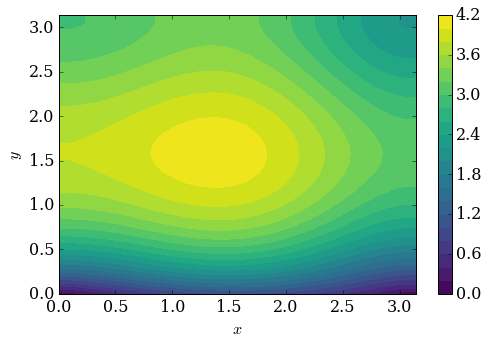

In [13]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,U,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();